<a href="https://colab.research.google.com/github/restiso7788/Linear_Regression_CellBox/blob/main/leave_one_out.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statistics


In [2]:
df = pd.read_csv('/content/expert.csv')

# leave_one drug out

clf = LinearRegression()
def linear_regression(response,train,test,tags,temp_data):
    new_df = pd.DataFrame()
    for i in range(response.shape[1]-12):
        y = response.iloc[:,i]
        train_y = y[y.index.isin(tags)]
        test_y = y[~y.index.isin(tags)]   
        clf.fit(train, train_y)      
        clf_y = clf.predict(test)
        new_reponse = test_y.name
        new_df[new_reponse] = clf_y
    return new_df

results_dict = {}
for i in range(-12,0):
    col = df.columns[i]
    
    train = df[df[col] == 0]
    train_tag = train.index
    
    X = df.iloc[:,-12:]
    train_x = X[X.index.isin(train_tag)]
    test_x = X[~X.index.isin(train_tag)]
    
    temp_data = df[~df.index.isin(train_tag)].iloc[:,:87].reset_index(drop = True)
    
    my_result = linear_regression(df, train_x, test_x, train_tag, temp_data)
    my_result_x = temp_data
    x_all = my_result_x.values.flatten()
    my_result_y = my_result
    y_all = my_result_y.values.flatten()
    r = np.corrcoef(x_all, y_all)[0][1]
    
    results_dict[col] = r
    
print(results_dict)

{'aMEK': 0.8203552039176905, 'aAKT': 0.6760469536146299, 'aHDAC': 0.7214189176457171, 'aMDM2': 0.9256889947226677, 'aJAK': 0.9115876220832254, 'aBRAFm': 0.8719448047546596, 'aPKC': 0.677952596450868, 'aSTAT3': 0.9021462697367114, 'amTOR': 0.5914147254624399, 'aPI3K': 0.7791282904349198, 'aCDK4': 0.6342000388819491, 'aSRC': 0.8985285213268935}


In [3]:
values = results_dict.values()
statistics.mean(values)

0.7842010782526977

In [4]:
lr_result=list(results_dict.values())
cellbox = [0.846, 0.79, 0.706, 0.888, 0.888, 0.881, 0.672, 0.549, 0.891, 0.89, 0.605, 0.756]
statistics.mean(cellbox)        

0.7801666666666667

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(-1.1, 1.1, 'B')

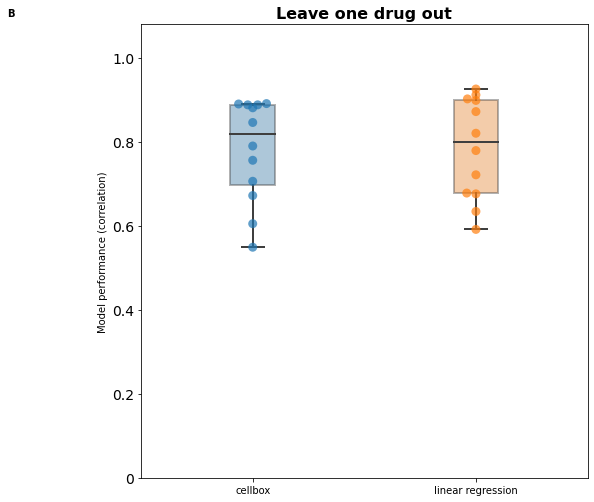

In [5]:
#box plot between CellBox and Linear Regression
import seaborn as sns
import matplotlib.pyplot as plt
f, (ax2) = plt.subplots(1,figsize = [8, 10])
plt.gcf().subplots_adjust(bottom=0.25, wspace = 0.25)

plt.gcf().subplots_adjust(bottom=0.25, wspace = 0.25)

tmp_x, tmp_y = np.hstack([[2*np.ones(12), lr_result],
                          [np.ones(12), cellbox]])

sns.swarmplot(tmp_x, tmp_y, size = 9, alpha = 0.7)
sns.boxplot(tmp_x, tmp_y, linewidth=2, width = 0.2, boxprops=dict(alpha=0.4))

ax2.set_xlim(-0.5, 1.5)
ax2.set_ylim(0, 1.08)
ax2.set_title('Leave one drug out', 
              weight='bold', size=16)
ax2.set_yticks([0,0.2,0.4,0.6,0.8,1.0])
ax2.set_yticklabels([0,0.2,0.4,0.6,0.8,1.0], size=14)
ax2.set_ylabel('Model performance (correlation)')
ax2.set_xticks(np.arange(0,2))
ax2.set_xticklabels(['cellbox','linear regression'])
ax2.text(-1.1,1.1,"B", weight='bold')

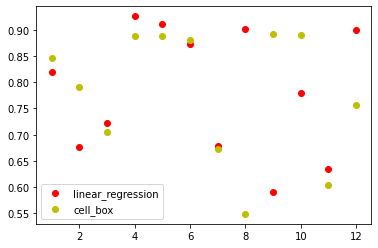

In [6]:
range = [1,2,3,4,5,6,7,8,9,10,11,12]
plt.scatter(range, lr_result, color='r',label = "linear_regression")
plt.scatter(range, cellbox, color='y',label = "cell_box")
plt.legend(loc="lower left")
plt.show()